In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)


Saving mental_health_workplace_survey.csv to mental_health_workplace_survey (15).csv
Accuracy of linear regression: 0.9833333333333333
Confusion matrix:
 [[423   5]
 [  5 167]]
ROC-AOC Probability: 0.9990083677461421
Accuracy of LDA: 0.95
Confusion matrix of LDA:
 [[398  30]
 [  0 172]]
ROC-AOC Probability of LDA: 0.9982884155618343


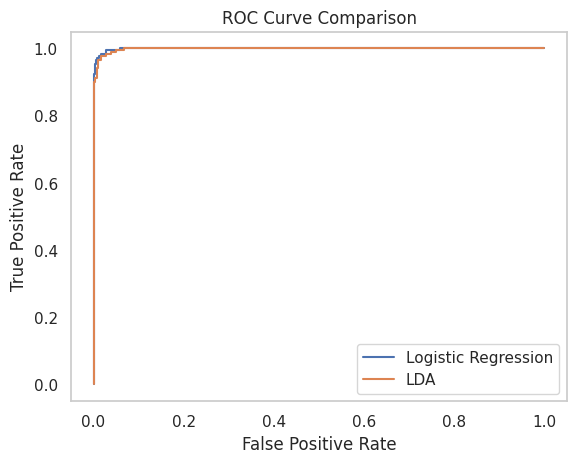

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from scipy import sparse

from google.colab import files
uploaded = files.upload()
df = pd.read_csv("mental_health_workplace_survey.csv")

y = df['BurnoutRisk']

X = df.drop(['BurnoutRisk'], axis=1)


categorical_cols = X.select_dtypes(include='object').columns
encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded_array = encoder.fit_transform(X[categorical_cols])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols), index=X.index)

numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
numeric_df = X[numeric_cols]

X_final = pd.concat([numeric_df, encoded_df], axis=1)


scaler = StandardScaler()
X_final_scaled = scaler.fit_transform(X_final)


X_train, X_test, y_train, y_test = train_test_split(X_final_scaled, y, test_size=0.2)

logic_reg = LogisticRegression(max_iter=1000)
lda = LDA()

logic_reg.fit(X_train,y_train)
lda.fit(X_train,y_train)

pred_lr = logic_reg.predict(X_test)
pred_lda = lda.predict(X_test)

prob_lr = logic_reg.predict_proba(X_test)[:,1]
prob_lda = lda.predict_proba(X_test)[:,1]

print("Accuracy of linear regression:",accuracy_score(y_test,pred_lr))
print("Confusion matrix:\n",confusion_matrix(y_test,pred_lr))
print("ROC-AOC Probability:",roc_auc_score(y_test,prob_lr))

print("Accuracy of LDA:",accuracy_score(y_test,pred_lda))
print("Confusion matrix of LDA:\n",confusion_matrix(y_test,pred_lda))
print("ROC-AOC Probability of LDA:",roc_auc_score(y_test,prob_lda))


fpr_lr , tpr_lr , threshold  = roc_curve(y_test,prob_lr)
fpr_lda , tpr_lda , threshold_lda = roc_curve(y_test,prob_lda)


fpr_lr, tpr_lr, threshold = roc_curve(y_test, prob_lr)
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')


fpr_lda, tpr_lda, threshold = roc_curve(y_test, prob_lda)
plt.plot(fpr_lda, tpr_lda, label='LDA')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid()
plt.show()